<a href="https://colab.research.google.com/github/rknethinti/EDA-Airbnb-bookings-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Name: Kaimur Data Stimulators**

**Team Members:** 1) Nethinti Ramakrishna (Team Leader)
              2) Sahil Sukhadeve
              3) Ghanshyam Mali
              4) Sudhanshu Patil

## **What is Airbnb?**
#### Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

# **Our Objective in this Analysis::**



### <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

### <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

### <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [7]:
# importing important libraries using in this EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path= "/content/drive/MyDrive/Alma Better/Modules/Topic/Capstone Projects/Airbnb Bookings analysis- Nethinti Ramakrishna/Airbnb NYC 2019.csv"

In [6]:
airbnb= pd.read_csv(path)

In [10]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [13]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

as "last_review" and "reviews_per_month" have more than 10,000 null values, it affects the outcomes of Data analysis; So, we are
removing these columns and also as we are not doing any analysis specifically on latitude and longitude, we're also removing these 
variables as well

In [14]:
# dropping unnecessary data

airbnb.drop(['last_review','reviews_per_month','latitude','longitude'],axis=1,inplace=True)

In [15]:
airbnb.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355


In [18]:
plt.figure(figsize=(16,6))

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [ ]:
airbnb.shape

(48895, 12)

Now we have 48895 rows and 12 important columns ready for analysis

In [ ]:
list(airbnb.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

# 1) What can we learn about different hosts and areas?

In [44]:
# analysing hosts and areas using groupby function

hosts_and_areas= airbnb.groupby(['host_name','neighbourhood_group'])["calculated_host_listings_count"].count().reset_index()

haa= hosts_and_areas.sort_values('calculated_host_listings_count',ascending=False).head(10)
haa

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
6808,John,Manhattan,151
3249,David,Brooklyn,142
7275,Kara,Manhattan,135
432,Alex,Manhattan,134
9856,Mike,Manhattan,134


### Here are some intersting findings,we found fascinating: 

#### 8 out of top 10 hosts are from the  ''Manhattan''  neighbourhood group.

#### 2 out of top 10 hosts are from the  ''Brooklyn"  neighbourhood group.

#### [ Sonder (NYC), Blueground, Michael, David, John, Kara, Alex, Mike] are the top hosts of   Manhattan neighbourhood group.

#### [ Michael,David] are the top hosts in Brooklyn neighbourhood group.

#### Manhattan neighbourhood group hosts are out-performing in listings.


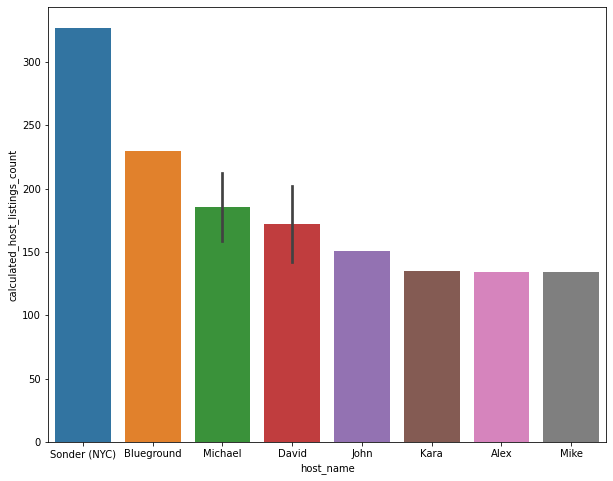

In [47]:
# representing the above analysis through plotting using seaborn

plt.figure(figsize=(10,8))
sns.barplot(x= haa['host_name'],y=haa['calculated_host_listings_count'])



# 2) What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [49]:
# prices in different localities
loc_price= airbnb.groupby(['name','neighbourhood_group','neighbourhood','price','minimum_nights'])['number_of_reviews'].count().reset_index()

top_prices= loc_price.sort_values('price',ascending=False).head(20)


In [50]:
top_prices

,name,neighbourhood_group,neighbourhood,price,minimum_nights,number_of_reviews
20222,Furnished room in Astoria apartment,Queens,Astoria,10000,100,1
1112,1-BR Lincoln Center,Manhattan,Upper West Side,10000,30,1
27228,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,10000,5,1
36159,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,9999,99,1
41053,Spanish Harlem Apt,Manhattan,East Harlem,9999,5,1
2225,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,9999,30,1
7092,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,8500,30,1
19735,Film Location,Brooklyn,Clinton Hill,8000,1,1
18366,East 72nd Townhouse by (Hidden by Airbnb),Manhattan,Upper East Side,7703,1,1
2749,70' Luxury MotorYacht on the Hudson,Manhattan,Battery Park City,7500,1,1


## Price Vs Location analysis shown some interesting facts:

###  The highest price is 10,000 usd and can be seen in  Astoria, Upper west side, lower east side, Greenpoint and East Harlem.

#### most minimum nights  spent in top 20 price list are,

###### - Luxury TriBeCa Apartment at an amazing price - 180 nights
###### - Furnished room in Astoria apartment - 100 nights
###### - Quiet, Clean, Lit @ LES & Chinatown	- 99 nights
###### - highest priced rooms (i.e., 10,000usd) are present in Manhattan, Brooklyn and Queens neighbourhood group 



Text(0.5, 1.0, 'Max Prices in different neighbourhood ')

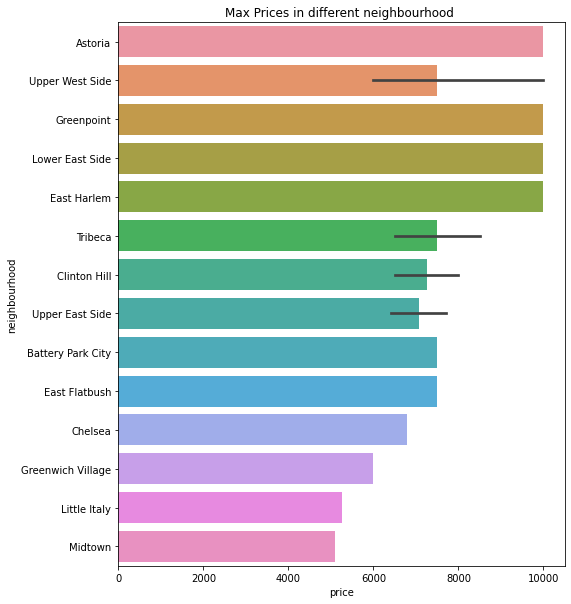

In [61]:
plt.figure(figsize=(8,10))
sns.barplot(x= top_prices['price'],y=top_prices['neighbourhood'])
plt.title('Max Prices in different neighbourhood ')

# 3) Which hosts are the busiest and why?

In [57]:
# finding busiest hosts 

busiest_hosts= airbnb.groupby(['host_name','neighbourhood_group','room_type'])["minimum_nights"].count().reset_index()

busy_host= busiest_hosts.sort_values('minimum_nights', ascending=False).head()
busy_host

,host_name,neighbourhood_group,room_type,minimum_nights
16549,Sonder (NYC),Manhattan,Entire home/apt,319
2295,Blueground,Manhattan,Entire home/apt,230
12299,Michael,Manhattan,Entire home/apt,143
9190,Kara,Manhattan,Entire home/apt,129
4128,David,Manhattan,Entire home/apt,117


#### 5 out of top 5 are all from " Manhattan" neighbourhood group

#### Sonder(NYC) , Blueground, Michael, Kara, David are the top 5 most busiest hosts

Text(0.5, 1.0, 'Top 5 busiest hosts')

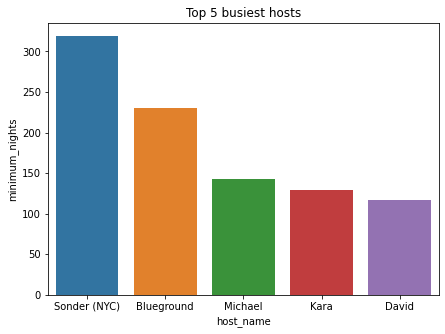

In [60]:
plt.figure(figsize=(7,5))

sns.barplot(x=busy_host['host_name'],y=busy_host['minimum_nights'] )
plt.title('Top 5 busiest hosts')

# 4) Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [65]:
traffic_areas= airbnb.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traf_area=traffic_areas.sort_values('minimum_nights',ascending=False).head(15)
traf_area

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


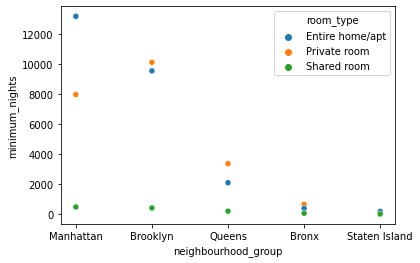

In [66]:
sns.scatterplot(x=traf_area['neighbourhood_group'], y=traf_area['minimum_nights'], hue=traf_area['room_type'])